### **Klasifikacija** <br>
Pravimo model kojim se predvidjaju vrednosti diskretne (kategoricke) ciljne promenljive. <br>
**Binarna klasifikacija** je kada ciljna promenljiva moze imati samo dve vrednosti (npr. detekcija spam poruka, da li je detektovani tumor benigni ili maligni, da li je obavljena transakcija regularna ili ne, ... ). Ukoliko ciljna promenljiva ima vise od dve moguce vrednosti, rec je o **viseklasnoj klasifikaciji** (npr. pogadjanje cifre napisane rukopisom...).  Bilo da je rec o binarnoj ili viseklasnoj klasifikaciji, ciljna promenljiva uzima tacno jednu vrednost.

### Mere kvaliteta
Mere koje se koriste za klasifikaciju su:
* tacnost klasifikacije (eng. classification **accuracy**), 
* preciznost i odziv (eng. **precision and recall**), 
* povrsina ispod ROC krive (eng. area under the curve – **AUC**)

<img src='matrica_konfuzije.png'>

<img src='mere.png'>

<img src='roc.png'>

### Logisticka regresija

**Logisticka regresija** (engl. logistic regression) je jedan od osnovnih modela binarne klasifikacije. Ona, takodje, koristi linearnu kombinaciju prediktora $X_1$, $X_2$, ..., $X_m$. Model je dat formulom $$f_\beta(X)= \frac{1}{1+e^{-(\beta_0 + \beta_1X_1 + \ldots + \beta_mX_m)}} = \frac{1}{1+e^{-\beta^T X}} = \sigma(\beta_0 + \beta_1X_1 + \ldots + \beta_mX_m)$$ gde je $\sigma(x)$ sigmoidna funkcija data sa $\sigma(x) = \frac{1}{1+e^{-x}}$.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Sigmoidna funkcija

In [3]:
N = 100
x = np.linspace(-10, 10, N)
y = 1/(1 + np.exp(-x))

In [ ]:
plt.plot(x, y, label = 'Sigmoidna funkcija')
plt.plot(x, [0.5]*N, color = 'red')
plt.legend(loc = 'best')
plt.show()

### Funkcija greske/Loss function

Parametri se odredjuju minimizacijom funkcije greske, **unakrsna entropija** (engl. binary crossentropy): $$-\sum_{i=1}^{N} (y_i logf_\beta(x_i) + (1-y_i)log(1-f_\beta(x_i))) = -\sum_{i=1}^{N} (y_i logy_{pred}^i + (1-y_i)log(1-y_{pred}^i))$$ 

In [4]:
# sve isto kao i do sada (za linearnu regresiju)
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [5]:
data = datasets.load_breast_cancer()

In [6]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
X = pd.DataFrame(data.data, columns = data.feature_names)

In [9]:
X.shape

(569, 30)

In [ ]:
X.info() # nema nedostajucih i cudnih tipova podataka

In [ ]:
X.describe()

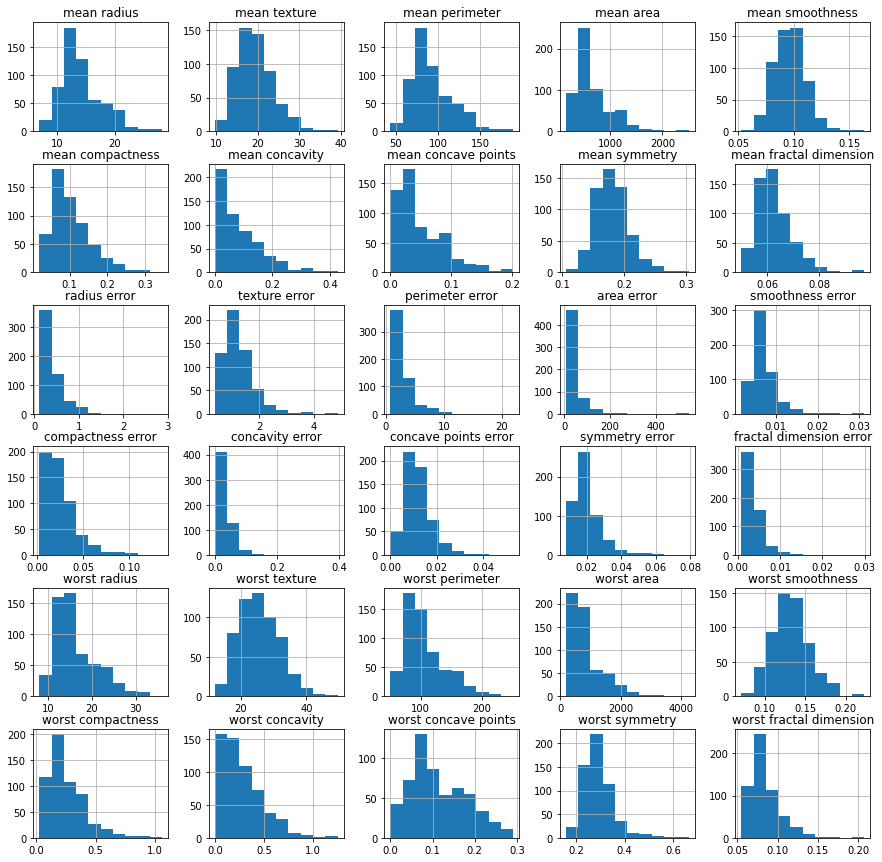

In [10]:
X.hist(figsize = [15,15]) 
plt.show()

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
y = data.target

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
print('Broj benignih instanci: ')
np.sum(y==1)

In [ ]:
print('Broj malignih instanci: ')
np.sum(y==0)

### Podela podataka na skup za treniranje i skup za testiranje

Parametar `stratify` vrsi stratifikaciju podataka - nacin podele podataka kojim se cuva distribucija klasa 

In [37]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [38]:
X_train.shape, X_test.shape

((381, 30), (188, 30))

Provera stratifikovanosti:

In [ ]:
print('Trening')
m_train = np.sum(y_train == 0)
b_train = np.sum(y_train == 1)
print('Benigni: ', b_train, 'Maligni: ', m_train)

In [ ]:
print('Test')
m_test = np.sum(y_test == 0)
b_test = np.sum(y_test == 1)
print('Benigni: ', b_test, 'Maligni: ', m_test)

### Standaradizacija podataka

In [39]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Treniranje modela

In [40]:
model = linear_model.LogisticRegression(solver='lbfgs')

In [41]:
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
model.intercept_

array([0.24518984])

In [19]:
model.coef_

array([[-0.28488259, -0.5036704 , -0.30845374, -0.43124456, -0.0885936 ,
         0.46530026, -0.63431362, -0.5799997 , -0.19622748,  0.29418451,
        -1.0734335 ,  0.17985058, -0.551678  , -0.88684956, -0.06873348,
         0.79862352, -0.1564331 , -0.41965439,  0.27938466,  0.45749103,
        -0.95434897, -1.14556574, -0.75325776, -0.975012  , -0.58396992,
         0.08148169, -0.72493983, -0.89869581, -0.70564949, -0.64264675]])

In [ ]:
# Vrednosti koeficijenata
N = len(data.feature_names)
values = model.coef_[0]
plt.figure(figsize = (10, 5))
plt.bar(np.arange(0, N), values)
plt.xticks(np.arange(0, N), data.feature_names, rotation='vertical')

plt.show()

Odmah se moze uvideti da atributi `radius error`, `worst texture` ili `worst area` znacajni u pogadjanju negativne klase tj. maligni tumor, dok je atribut `compactness error` znacajan za pogadjanje pozitivne klase tj. benigni tumor. 

### Evaluacija

In [43]:
y_test_predicted = model.predict(X_test)

In [44]:
y_test_predicted # default threshold 0.5 

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [45]:
metrics.accuracy_score(y_test, y_test_predicted)

0.9893617021276596

In [46]:
metrics.precision_score(y_test, y_test_predicted)

0.9915254237288136

In [47]:
metrics.recall_score(y_test, y_test_predicted)

0.9915254237288136

In [48]:
y_train_predicted = model.predict(X_train)

In [49]:
train_score = metrics.accuracy_score(y_train, y_train_predicted)

In [50]:
test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [51]:
print("Tacnost na skupu za treniranje: {train}\nTacnost na skupu za testiranje: {test}".format(train=train_score, test=test_score))

Tacnost na skupu za treniranje: 0.9868766404199475
Tacnost na skupu za testiranje: 0.9893617021276596


In [52]:
# sve mere na jednom mestu
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.99      0.99      0.99       118

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



$$F1 Score = 2*(Recall * Precision) / (Recall + Precision)$$

Makro prosek (`macro avg`) se racuna kao prosek dobijenih vrednosti po klasama.

Tezinski prosek (`weighted avg`) se racuna kao prosek ponderisan brojcanim udelom svake klase.

### Matrica konfuzije

In [ ]:
metrics.confusion_matrix(y_test, y_test_predicted)

In [ ]:
# kada je potrebno radi se dodatna analiza instanci van dijagonale tj. promasenih predikcija

### ROC kriva

Pomocu funkcije modela `predict_proba` za svaku instancu pojedinacno se dobiju i ocene verovatnoca pripadnosti pozitivnoj tj. negativnoj klasi.

In [29]:
y_pred_proba = model.predict_proba(X_test)[::,1]

In [30]:
y_pred_proba[:10]

array([6.55200045e-01, 9.74547376e-01, 9.97459155e-01, 9.99962091e-01,
       7.06323413e-06, 9.93281045e-01, 9.99966546e-01, 3.37012584e-03,
       8.44904052e-01, 9.99788899e-01])

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba) # funkcija roc_curve odredjuje moguce vrednosti za FP i TP

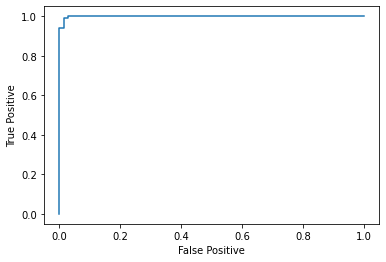

In [32]:
#create ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()

In [33]:
# Kvantifikacija

In [34]:
auc = metrics.roc_auc_score(y_test, y_pred_proba) # funkcija roc_auc_score racuna povrsinu ispod dobijene ROC krive

In [35]:
auc

0.9990314769975787

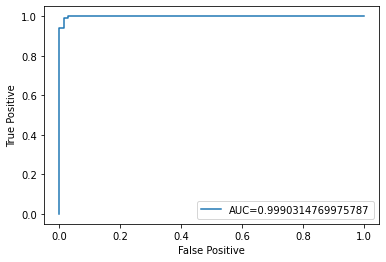

In [36]:
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.legend(loc=4)
plt.show()